<a href="https://colab.research.google.com/github/rselent/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/2_2_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy



Which party's record would you like to examine? democrat
And which bill would you like to inspect? crime
('29.15%, 35.02%, 40.89%', <Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff1746f0630>, <matplotlib.lines.Line2D object at 0x7ff17791de10>, <matplotlib.lines.Line2D object at 0x7ff17791d1d0>, <matplotlib.lines.Line2D object at 0x7ff1749e4f98>)

Which party's record would you like to examine? republican
And which bill would you like to inspect? crime
('96.03%, 98.14%, 100.25%', <Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at 0x7ff1749e4fd0>, <matplotlib.lines.Line2D object at 0x7ff177501668>, <matplotlib.lines.Line2D object at 0x7ff177576828>, <matplotlib.lines.Line2D object at 0x7ff177576160>)

Which party's record would you like to examine? democrat
And which bill would you like to inspect? immigration
('41.08%, 47.15%, 53.22%', <Figure size 432x288 with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot obje

0

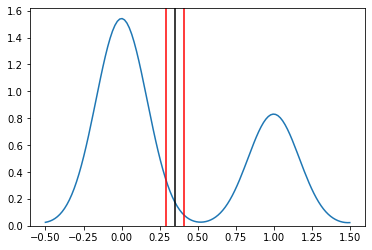

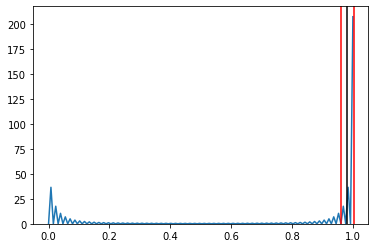

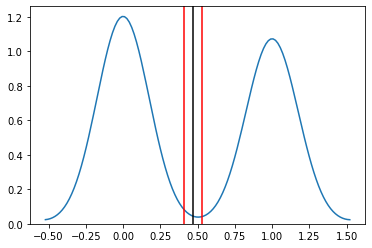

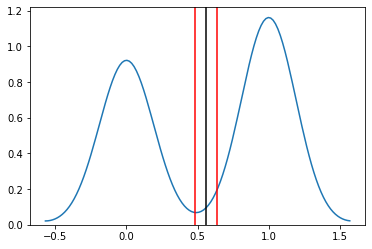

In [41]:
### YOUR CODE STARTS HERE

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, chisquare
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sp

# Generate list for df headers and df itself
columnHeaders =['party','handicapped-infants','water-project',
                'budget','physician-fee-freeze', 'el-salvador-aid',
                'religious-groups','anti-satellite-ban','aid-to-contras',
                'mx-missile','immigration','synfuels', 'education', 
                'right-to-sue','crime','duty-free','south-africa']

df = pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 header = None,
                 names = columnHeaders)

# Assignment / DF-specific variables -- split the dataset by party, then
# non-destructively replace str values with values that are more math-friendly
rep = df[ df.party == 'republican']
dem = df[ df.party == 'democrat']
rep1 = rep.replace({ 'y': 1, 'n': 0, '?': np.nan})
dem1 = dem.replace({ 'y': 1, 'n': 0, '?': np.nan})

# So, now that most of the big, important vars that we'll initially need are 
# defined, we can get down to making some Confidence Intervals
def confInt(data, confidence = 0.95):
    data = np.array( data)
    mean = np.mean( data)
    x = len( data)
    stdError = np.std( data, ddof = 1) / np.sqrt(x)
    errorMargin = stdError * stats.t.ppf(( 1 + confidence) / 2.0, x - 1 )
    return( "{:.2f}%, {:.2f}%, {:.2f}%".format( (mean - errorMargin)*100, 
                                               (mean)*100, 
                                               (mean + errorMargin)*100 ),
           ## Moved the KDEplot into the return() output (from preceding it) 
           ## in an effort to plot the graph immediately after the above 
           ## text output. 
           ## Unsuccessful in that so far, but because I added plt.figure()
           ## I'm now able to plot more than one graph at a time.
           ## Still getting verbose output
           plt.figure(),
           sns.kdeplot( data),
           plt.axvline( x =( mean - errorMargin), color = 'red'),
           plt.axvline( x =( mean + errorMargin), color = 'red'),
           plt.axvline( x =( mean), color = 'k') );

# Unnecessary, but fun for me:
# Prompt for user input/choice, then show corresponding data by calling confInt.
# if asked for incompatible or nonexistent data (e.g., 'arf'), responds with 0
def confIntQuest():
    while 1:
        party = input( "\nWhich party's record would you like to examine? " )
        bill  = input( "And which bill would you like to inspect? " )
        
        if party == "democrat":
            print( confInt( dem1[ bill].dropna()) );
        elif party == "republican":
            print( confInt( rep1[ bill].dropna()) );
        else:
            return(0);

confIntQuest()



3.   Interpret the confidence interval - what does it tell you about the data and its distribution?

    *   Generally speaking, a confidence interval is used to aid in determining the probability of something being true in a sample vis-a-vis the greater population that it represents. However, given the nature of the data that we need to work with for this Assignment, that's not really possible, unless we *assume* that Congressional representatives *actually **and accurately** represent their districts* and the wishes therein. Most would probably argue that hasn't been true since the 1950s at best, or maybe even since the 19th century.
    *   Another assumption that might have to be made -- depending on how one interprets the data, its results, and its purpose -- is that we're existing in some sort of Groundhog Day-esque existence, where the same day (or in this case, the same year) and the same votes are happening in perpetuity. 

That being said, in short, the confidence intervals tell me that this specific data is perhaps just too limited in scope, slightly too polarizing (as politics tend to be), and/or slightly too specific to be of any real value in making any sort of real-world prediction.


In [151]:
### CHI^2 by hand (*shudder*)

firesDataUrl = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
fires = pd.read_csv( firesDataUrl)

# Establish categorical variables
rainBands = [0, .01, 0.3, 0.4, 0.8, 2, 500]
labelNames = ['<0.1mm/m2', '0.1-0.2', '0.2-0.4', '0.4-0.8', '0.8-4', '4+']
fires['rainfall-per-month'] = pd.cut(fires['rain'], rainBands, labels=labelNames,
                                     include_lowest = True)
fires[ 'month'] = fires['month'].str.title()
print( fires[ 'rain'].value_counts(), "\n----------\n" )

conTable = pd.crosstab( fires[ 'month'], fires[ 'rainfall-per-month'], 
                       margins = True )
conObserve = pd.crosstab( fires[ 'month'], fires[ 'rainfall-per-month'] )

print( conTable, "\n----------\n")

# Maybe I should've picked a dataset that wouldn't have necessitated a 12x6 matrix...
April = conTable.iloc[0][0:6].values
August = conTable.iloc[1][0:6].values
Dec = conTable.iloc[2][0:6].values
Feb = conTable.iloc[3][0:6].values
Jan = conTable.iloc[4][0:6].values
July = conTable.iloc[5][0:6].values
June = conTable.iloc[6][0:6].values
March = conTable.iloc[7][0:6].values
May = conTable.iloc[8][0:6].values
Nov = conTable.iloc[9][0:6].values
Oct = conTable.iloc[10][0:6].values
Sept = conTable.iloc[11][0:6].values

rowSums = conTable.iloc[0:11, 6].values
colSums = conTable.iloc[11, 0:6].values

print( rowSums, "\n", colSums, "\n", df.shape[0], "\n----------\n")

expectation = []
for i in range( len( rowSums) ):
  expectedRow = []
  for column in colSums:
    expectedVal = column * rowSums[i] / fires.shape[0]
    expectedRow.append( expectedVal)
  expectation.append(expectedRow)
  
expectation = np.array( expectation)

print(expectation.shape)  
print( expectation, "\n----------\n")


conObserve = pd.crosstab( fires[ 'month'], fires[ 'rainfall-per-month']).values
print( conObserve.shape)
conObserve

0.0    509
0.8      2
0.2      2
0.4      1
6.4      1
1.4      1
1.0      1
Name: rain, dtype: int64 
----------

rainfall-per-month  <0.1mm/m2  0.1-0.2  0.2-0.4  0.4-0.8  0.8-4  4+  All
month                                                                   
Apr                         9        0        0        0      0   0    9
Aug                       178        0        1        2      2   1  184
Dec                         9        0        0        0      0   0    9
Feb                        20        0        0        0      0   0   20
Jan                         2        0        0        0      0   0    2
Jul                        31        1        0        0      0   0   32
Jun                        17        0        0        0      0   0   17
Mar                        53        1        0        0      0   0   54
May                         2        0        0        0      0   0    2
Nov                         1        0        0        0      0   0    1
Oct      

array([[  9,   0,   0,   0,   0,   0],
       [178,   0,   1,   2,   2,   1],
       [  9,   0,   0,   0,   0,   0],
       [ 20,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0],
       [ 31,   1,   0,   0,   0,   0],
       [ 17,   0,   0,   0,   0,   0],
       [ 53,   1,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0],
       [ 15,   0,   0,   0,   0,   0],
       [172,   0,   0,   0,   0,   0]])

In [152]:
### AND now for the Scipy way! 
### (I pronounce it 'Skippy', because it's faster and more fun..)

chiSquared, pVal, depthOfWilliamWallace, expectation = stats.chi2_contingency(conObserve)

print( f"Chi-Squared: {chiSquared}" )
print( f"P-value: {pVal}" )
print( f"Degrees of Freedom: {depthOfWilliamWallace}" ) 
print( "Expected: \n", np.array( expectation) )

Chi-Squared: 21.847398942623755
P-value: 0.9999819192203677
Degrees of Freedom: 55
Expected: 
 [[8.86073501e+00 3.48162476e-02 1.74081238e-02 3.48162476e-02
  3.48162476e-02 1.74081238e-02]
 [1.81152805e+02 7.11798839e-01 3.55899420e-01 7.11798839e-01
  7.11798839e-01 3.55899420e-01]
 [8.86073501e+00 3.48162476e-02 1.74081238e-02 3.48162476e-02
  3.48162476e-02 1.74081238e-02]
 [1.96905222e+01 7.73694391e-02 3.86847195e-02 7.73694391e-02
  7.73694391e-02 3.86847195e-02]
 [1.96905222e+00 7.73694391e-03 3.86847195e-03 7.73694391e-03
  7.73694391e-03 3.86847195e-03]
 [3.15048356e+01 1.23791103e-01 6.18955513e-02 1.23791103e-01
  1.23791103e-01 6.18955513e-02]
 [1.67369439e+01 6.57640232e-02 3.28820116e-02 6.57640232e-02
  6.57640232e-02 3.28820116e-02]
 [5.31644101e+01 2.08897485e-01 1.04448743e-01 2.08897485e-01
  2.08897485e-01 1.04448743e-01]
 [1.96905222e+00 7.73694391e-03 3.86847195e-03 7.73694391e-03
  7.73694391e-03 3.86847195e-03]
 [9.84526112e-01 3.86847195e-03 1.93423598e-03 3.8

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)